In [1]:
# Install the necessary packages if not already installed
#pip install s3fs
#pip install nltk
#pip install wordcloud
#pip install seaborn

# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load S3 Bucket into Pandas Dataframe

In [2]:
# Clean csv file so it can be read into a dataframe
file_path = 's3://trumptweetscsv/hashtag_donaldtrump.csv'
total_rows = 971158
chunk_size = 5000
chunks = []

# Load the file in chunks
for start_row in range(0, total_rows, chunk_size):
    try:
        chunk = pd.read_csv(file_path, skiprows=range(1, start_row), nrows=chunk_size)
        chunks.append(chunk)
        print(f"Rows {start_row} to {start_row + chunk_size} loaded successfully.")
    except Exception as e:
        print(f"Error reading rows {start_row} to {start_row + chunk_size}:", e)

        # Attempt to load smaller chunks within the problematic range
        inner_chunk_size = 1000
        for inner_start_row in range(start_row, start_row + chunk_size, inner_chunk_size):
            try:
                inner_chunk = pd.read_csv(file_path, skiprows=range(1, inner_start_row), nrows=inner_chunk_size)
                chunks.append(inner_chunk)
                print(f"Rows {inner_start_row} to {inner_start_row + inner_chunk_size} loaded successfully.")
            except Exception as e2:
                print(f"Error reading rows {inner_start_row} to {inner_start_row + inner_chunk_size}:", e2)

# Combine all chunks into a single dataframe
trump_df = pd.concat(chunks, ignore_index=True)

Rows 0 to 5000 loaded successfully.
Error reading rows 5000 to 10000: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Rows 5000 to 6000 loaded successfully.
Rows 6000 to 7000 loaded successfully.
Rows 7000 to 8000 loaded successfully.
Rows 8000 to 9000 loaded successfully.
Rows 9000 to 10000 loaded successfully.
Rows 10000 to 15000 loaded successfully.
Rows 15000 to 20000 loaded successfully.
Rows 20000 to 25000 loaded successfully.
Rows 25000 to 30000 loaded successfully.
Rows 30000 to 35000 loaded successfully.
Rows 35000 to 40000 loaded successfully.
Rows 40000 to 45000 loaded successfully.
Error reading rows 45000 to 50000: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Rows 45000 to 46000 loaded successfully.
Rows 46000 to 47000 loaded successfully.
Rows 47000 to 48000 loaded successfully.
Rows 48000 to 49000 loaded successfully.
Rows 49000 to 50000 loaded successfully.
Rows 50000 to 55000 loaded su

In [3]:
# Display dataframe
trump_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,828355589206056960.0,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


# Clean DataFrame

In [4]:
# Remove unnecessary columns
trump_df = trump_df.drop(columns=['tweet_id', 'source', 'user_id', 'user_name', 'user_screen_name', 'user_description', 'user_join_date', 'user_location', 'lat', 'long', 'city', 'continent', 'state_code', 'collected_at'])

# Display dataframe
trump_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,country,state
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,United States of America,Florida
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,1067661.0,NaN,NaN
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,1185.0,United States of America,Oregon
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,32.0,NaN,NaN
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,5393.0,United States of America,District of Columbia


In [5]:
# Drop rows that are not from the United States of America
trump_df = trump_df[trump_df['country'] == 'United States of America']

# Display dataframe
trump_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,country,state
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,United States of America,Florida
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,1185.0,United States of America,Oregon
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,5393.0,United States of America,District of Columbia
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,2363.0,United States of America,California
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,766.0,United States of America,Ohio


In [6]:
# Drop rows with NaN values
trump_df = trump_df.dropna()

# Display dataframe
trump_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,country,state
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,United States of America,Florida
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,1185.0,United States of America,Oregon
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,5393.0,United States of America,District of Columbia
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,2363.0,United States of America,California
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,766.0,United States of America,Ohio


In [7]:
# Get info on the dataframe
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172054 entries, 0 to 971075
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            172054 non-null  object 
 1   tweet                 172054 non-null  object 
 2   likes                 172054 non-null  object 
 3   retweet_count         172054 non-null  float64
 4   user_followers_count  172054 non-null  object 
 5   country               172054 non-null  object 
 6   state                 172054 non-null  object 
dtypes: float64(1), object(6)
memory usage: 10.5+ MB


In [8]:
# Convert 'likes' and 'user_followers_count' to numeric
trump_df['likes'] = pd.to_numeric(trump_df['likes'], errors='coerce')
trump_df['user_followers_count'] = pd.to_numeric(trump_df['user_followers_count'], errors='coerce')

# Convert 'created_at' to datetime
trump_df['created_at'] = pd.to_datetime(trump_df['created_at'], errors='coerce')

In [9]:
# Confirm changes
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172054 entries, 0 to 971075
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            172054 non-null  datetime64[ns]
 1   tweet                 172054 non-null  object        
 2   likes                 172054 non-null  float64       
 3   retweet_count         172054 non-null  float64       
 4   user_followers_count  172054 non-null  float64       
 5   country               172054 non-null  object        
 6   state                 172054 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 10.5+ MB


# Clean Tweets

In [10]:
# Text cleaning
import re

def clean_tweet_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)     # Remove mentions
    text = re.sub(r'#\S+', '', text)     # Remove hashtags
    text = re.sub(r'[^a-z\s]', '', text) # Remove non-alphabetic characters
    return text

trump_df['cleaned_tweet'] = trump_df['tweet'].apply(clean_tweet_text)

In [11]:
# Remove rows where 'tweet' is an empty string
trump_df = trump_df[trump_df['cleaned_tweet'].astype(str).str.strip() != '']

In [12]:
# Display dataframe
trump_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,country,state,cleaned_tweet
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,United States of America,Florida,en dice que solo se preocupa por l mismo ...
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,1185.0,United States of America,Oregon,as a student i used to hear for years for ten...
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,5393.0,United States of America,District of Columbia,you get a tie and you get a tie s rally
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,2363.0,United States of America,California,her minutes were over long time ago omarosa ...
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,766.0,United States of America,Ohio,there wont be many of them unless you all ...


In [13]:
# Import the NLTK library and download the VADER lexicon
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/keyanapregent/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# Import the SentimentIntensityAnalyzer class from the NLTK library
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to DataFrame
trump_df['sentiment'] = trump_df['cleaned_tweet'].apply(get_vader_sentiment)

In [15]:
# Display dataframe
trump_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,country,state,cleaned_tweet,sentiment
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,United States of America,Florida,en dice que solo se preocupa por l mismo ...,neutral
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,1185.0,United States of America,Oregon,as a student i used to hear for years for ten...,positive
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,5393.0,United States of America,District of Columbia,you get a tie and you get a tie s rally,neutral
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,2363.0,United States of America,California,her minutes were over long time ago omarosa ...,negative
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,766.0,United States of America,Ohio,there wont be many of them unless you all ...,negative


In [16]:
# Save cleaned dataframe to a new csv file
trump_df.to_csv('Resources/hashtag_donaldtrump_cleaned.csv', index=False) #Will be stored in S3 bucket

# Correlation

In [17]:
# Assign numerical values to sentiments (e.g., positive: 1, neutral: 0, negative: -1)
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
trump_df['sentiment_numeric'] = trump_df['sentiment'].map(sentiment_mapping)

In [18]:
# Selecting relevant columns for correlation
columns_for_correlation = ['likes', 'retweet_count', 'user_followers_count', 'sentiment_numeric']
correlation_matrix = trump_df[columns_for_correlation].corr()

# Display the correlation matrix
print(correlation_matrix)

                         likes  retweet_count  user_followers_count  \
likes                 1.000000       0.957004              0.161155   
retweet_count         0.957004       1.000000              0.126280   
user_followers_count  0.161155       0.126280              1.000000   
sentiment_numeric     0.000665       0.000927             -0.000223   

                      sentiment_numeric  
likes                          0.000665  
retweet_count                  0.000927  
user_followers_count          -0.000223  
sentiment_numeric              1.000000  


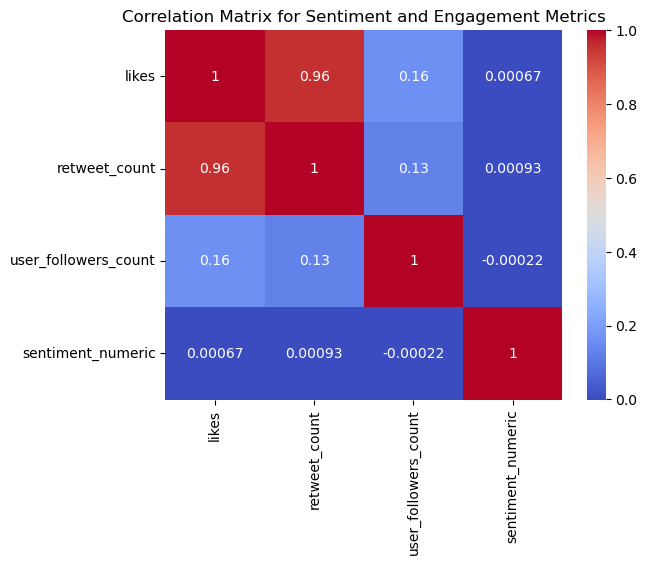

In [19]:
# Visualization of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Sentiment and Engagement Metrics')
plt.show()

# Regression Analysis

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Preparing data for regression analysis
X = trump_df[['likes', 'retweet_count', 'user_followers_count']]
y = trump_df['sentiment_numeric']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)


/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"R-squared Score: {R2}")

Mean Absolute Error: 0.747297866781218
Mean Squared Error: 0.7422290272227924
R-squared Score: -5.9926686355238346e-05


/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

# Visualizations

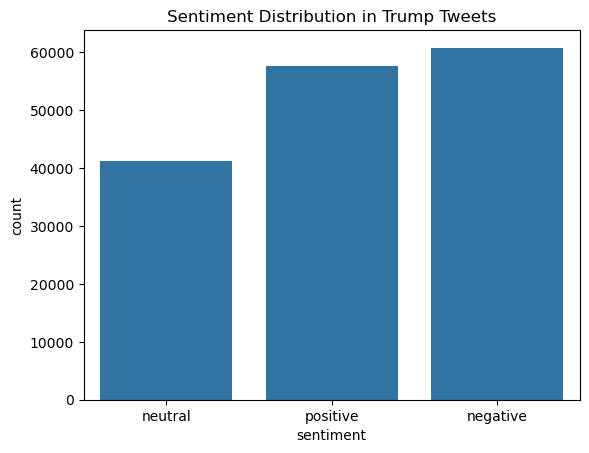

In [22]:
# Visualization of sentiment distribution
sns.countplot(x='sentiment', data=trump_df)
plt.title('Sentiment Distribution in Trump Tweets')
plt.show()

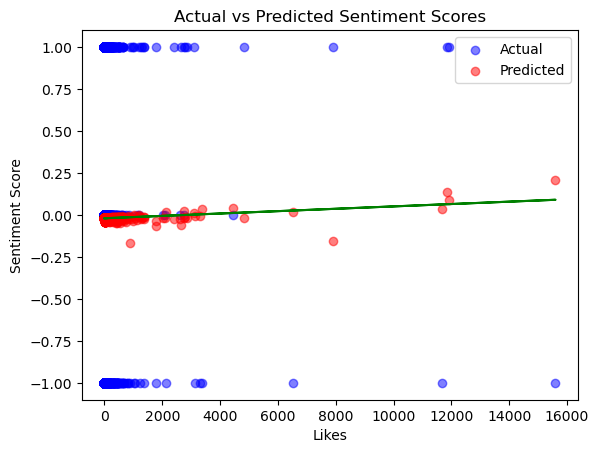

In [23]:
# Scatter plot of actual vs predicted values
plt.scatter(X_test['likes'], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test['likes'], y_pred, color='red', label='Predicted', alpha=0.5)

# Line of best fit
m, b = np.polyfit(X_test['likes'], y_pred, 1)
plt.plot(X_test['likes'], m*X_test['likes'] + b, color='green')

plt.xlabel('Likes')
plt.ylabel('Sentiment Score')
plt.title('Actual vs Predicted Sentiment Scores')
plt.legend()
plt.show()

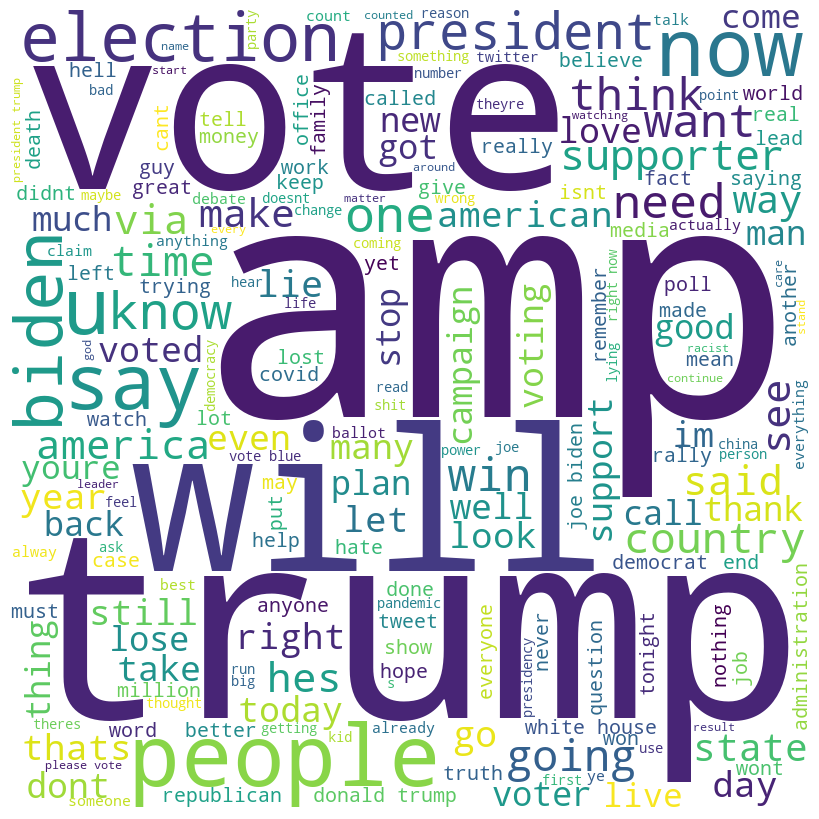

In [24]:
from wordcloud import WordCloud
# Join all tweets into a single string
text = ' '.join(trump_df['cleaned_tweet'])
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(text)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()